# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [895]:
#Import all the necessary modules
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import pylab
import scipy.stats as stats


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [896]:
pima_df = pd.read_csv("C:\\Users\\srivi\\Downloads\\Diabetes.csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [897]:
pima_df.head(10)
#pima_df.sample(10)  gives random sample of 10

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [898]:
pima_df.isnull().sum().any()

False

# Insight:
There are no missing values

# Q3 Print the datatypes of each column and the shape of the dataset 

In [899]:
print(pima_df.shape)

(768, 9)


# Insight:
There are totally 768 records and 9 columns including target column

In [900]:
print(pima_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


# Insight:
All the features are numeric(integer and float) and there are no object data type

In [901]:
#pima_df.dtypes

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [902]:
pima_df[pima_df == 0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

# Insight:
Except DiabetesPedigreeFunction and Age all other columns have 0's.

Having 0's for Pregnancies is quiet logical (0-nochild)

Also we dont want to remove 0's from target (Outcome) variable because it is a class

In [903]:
#pima_df['BloodPressure'].replace(to_replace=0,value=np.median(pima_df['BloodPressure']),inplace=True)
#pima_df['SkinThickness'].replace(to_replace=0,value=np.median(pima_df['SkinThickness']),inplace=True)
#pima_df['BloodPressure'].replace(to_replace=0,value=np.median(pima_df['BloodPressure']),inplace=True)

for col in pima_df:
    if col not in ['Pregnancies','Outcome']:
        pima_df[col].replace(to_replace=0,value=np.median(pima_df[col]),inplace=True)

#for col in pima_df[1:8]:
#    pima_df[col] = np.where(pima_df[col]==0,np.median(pima_df[col]),pima_df[col])

In [904]:
pima_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


In [905]:
pima_df[pima_df == 0].count()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

# Insight:
From the above 2 lines we can see that we have replaced all zeros by median except Pregnancies and Outcome column

# Q5 Print the descriptive statistics of each & every column using describe() function

In [906]:
pima_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Insight:
There are no negative values

if we compare mean and 50% for all features insulin shows greater deviation. Insulin is right skewed we can confirm it from the below distribution

if we compare mean and min/max we can see the ouliers for each feature. Insulin shows very huge max outlier.

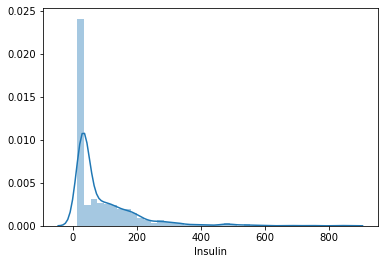

In [907]:
sns.distplot(pima_df['Insulin'])

# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

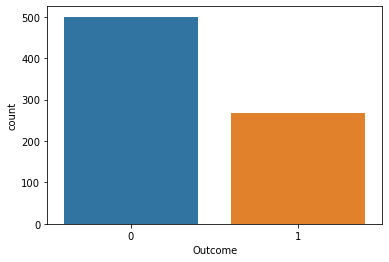

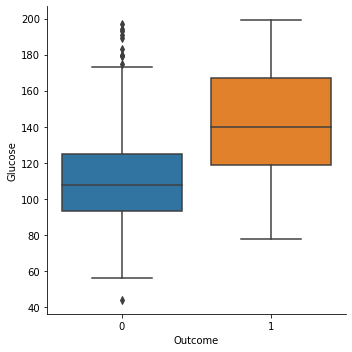

In [908]:
#sns.scatterplot(data=pima_df, x="Age", y="Glucose", hue="Outcome")
sns.countplot(x='Outcome',data=pima_df)
sns.catplot(x="Outcome", y="Glucose", kind="box", data=pima_df)

# Insight:
From count plot we can see the # of examples for both classes are not equal. we have an imbalance data set.

no. of samples for class 0 is greater than no. of samples for class 1

From box plot we can see that there are some outliers for glucose when class is 0 

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

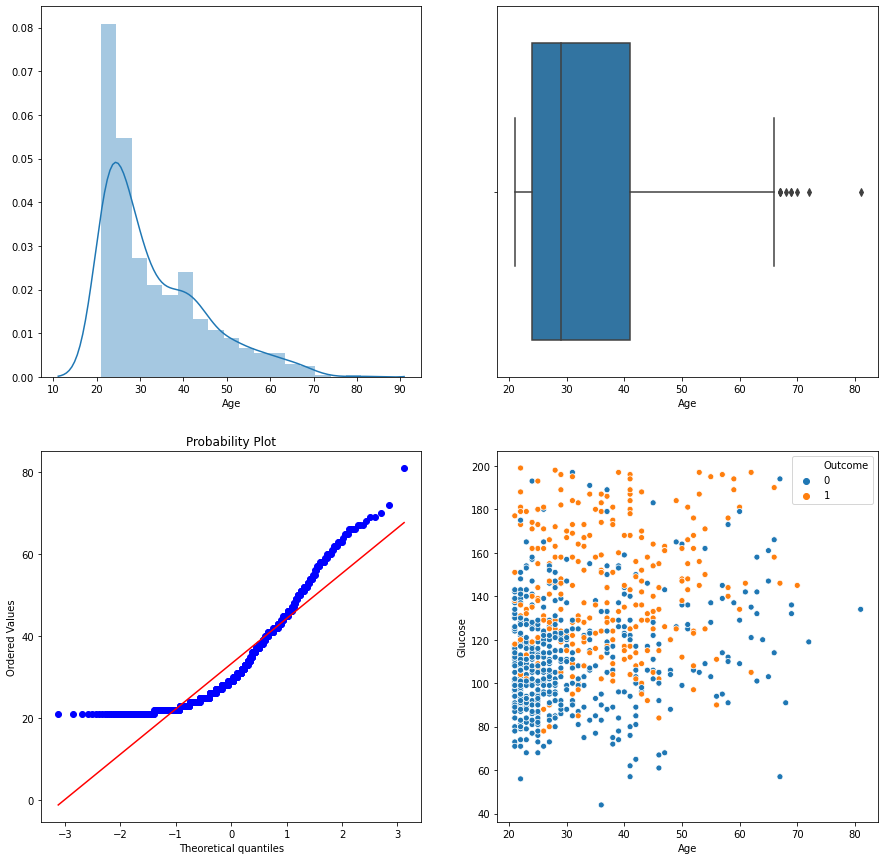

In [909]:
f, axes = plt.subplots(2, 2, figsize=(15,15))
sns.distplot(pima_df['Age'] , ax=axes[0,0])
sns.boxplot(x=pima_df['Age'], ax=axes[0,1])
stats.probplot(pima_df['Age'], dist="norm", plot=axes[1,0])
sns.scatterplot(data=pima_df, x="Age", y="Glucose", ax=axes[1,1], hue="Outcome")


# Insight:
From distplot and box plot we can see the age distribution is slightly right skewed and have max outliers.

From prob plot the distribution is not normal

From scatter plot we see there are non diabetic patients if the glucose level is less than 78 approx

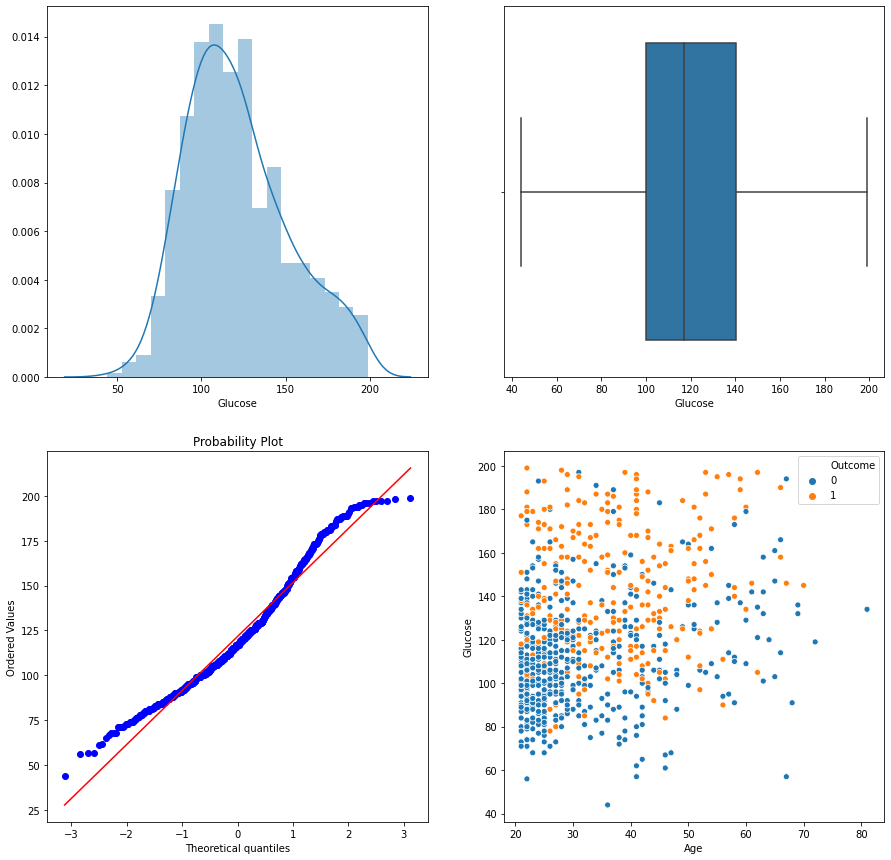

In [910]:
f, axes = plt.subplots(2, 2, figsize=(15,15))
sns.distplot(pima_df['Glucose'] , ax=axes[0,0])
sns.boxplot(x=pima_df['Glucose'], ax=axes[0,1])
stats.probplot(pima_df['Glucose'], dist="norm", plot=axes[1,0])
sns.scatterplot(data=pima_df, x="Age", y="Glucose", ax=axes[1,1], hue="Outcome")

# Insight:
From distplot and box plot we can see the age distribution is likely normal and has no outliers.

From prob plot the distribution is likely normal

From scatter plot we see there are non diabetic patients if the glucose level is less than 78

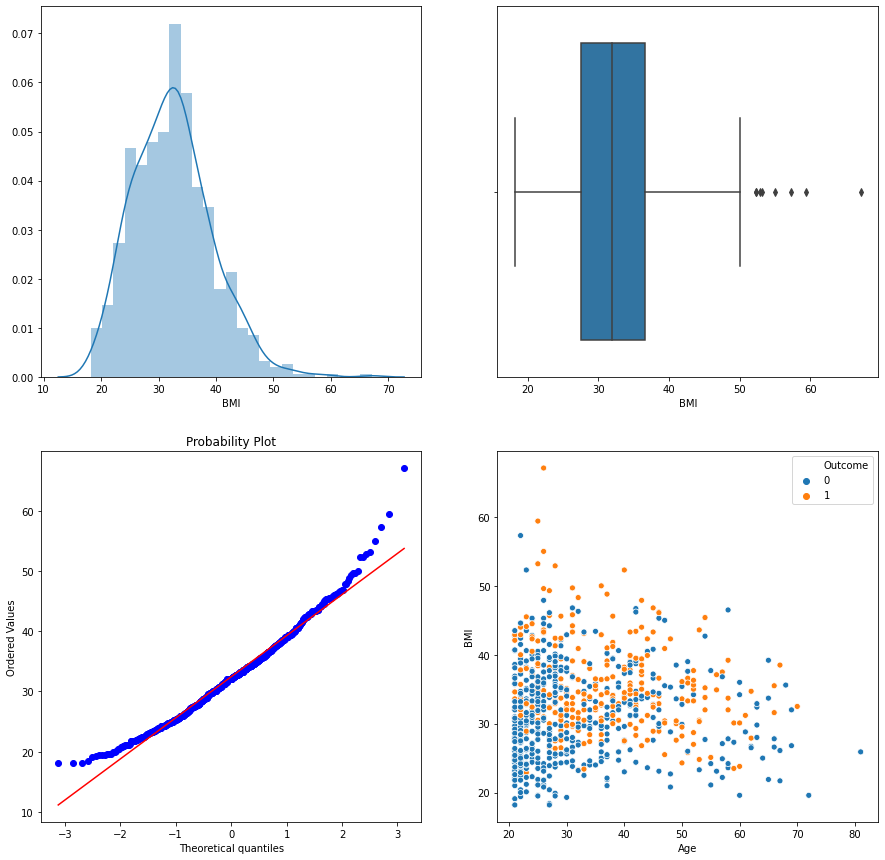

In [911]:
f, axes = plt.subplots(2, 2, figsize=(15,15))
sns.distplot(pima_df['BMI'] , ax=axes[0,0])
sns.boxplot(x=pima_df['BMI'], ax=axes[0,1])
stats.probplot(pima_df['BMI'], dist="norm", plot=axes[1,0])
sns.scatterplot(data=pima_df, x="Age", y="BMI", ax=axes[1,1], hue="Outcome")

# Insight:
From distplot and box plot we can see the age distribution is slightly right skewed and has outliers.

From prob plot the distribution is not normal

From scatter plot we see there are non diabetic patients if the BMI level is less than 23 approx but for other values of BMI there isn't much seperation

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

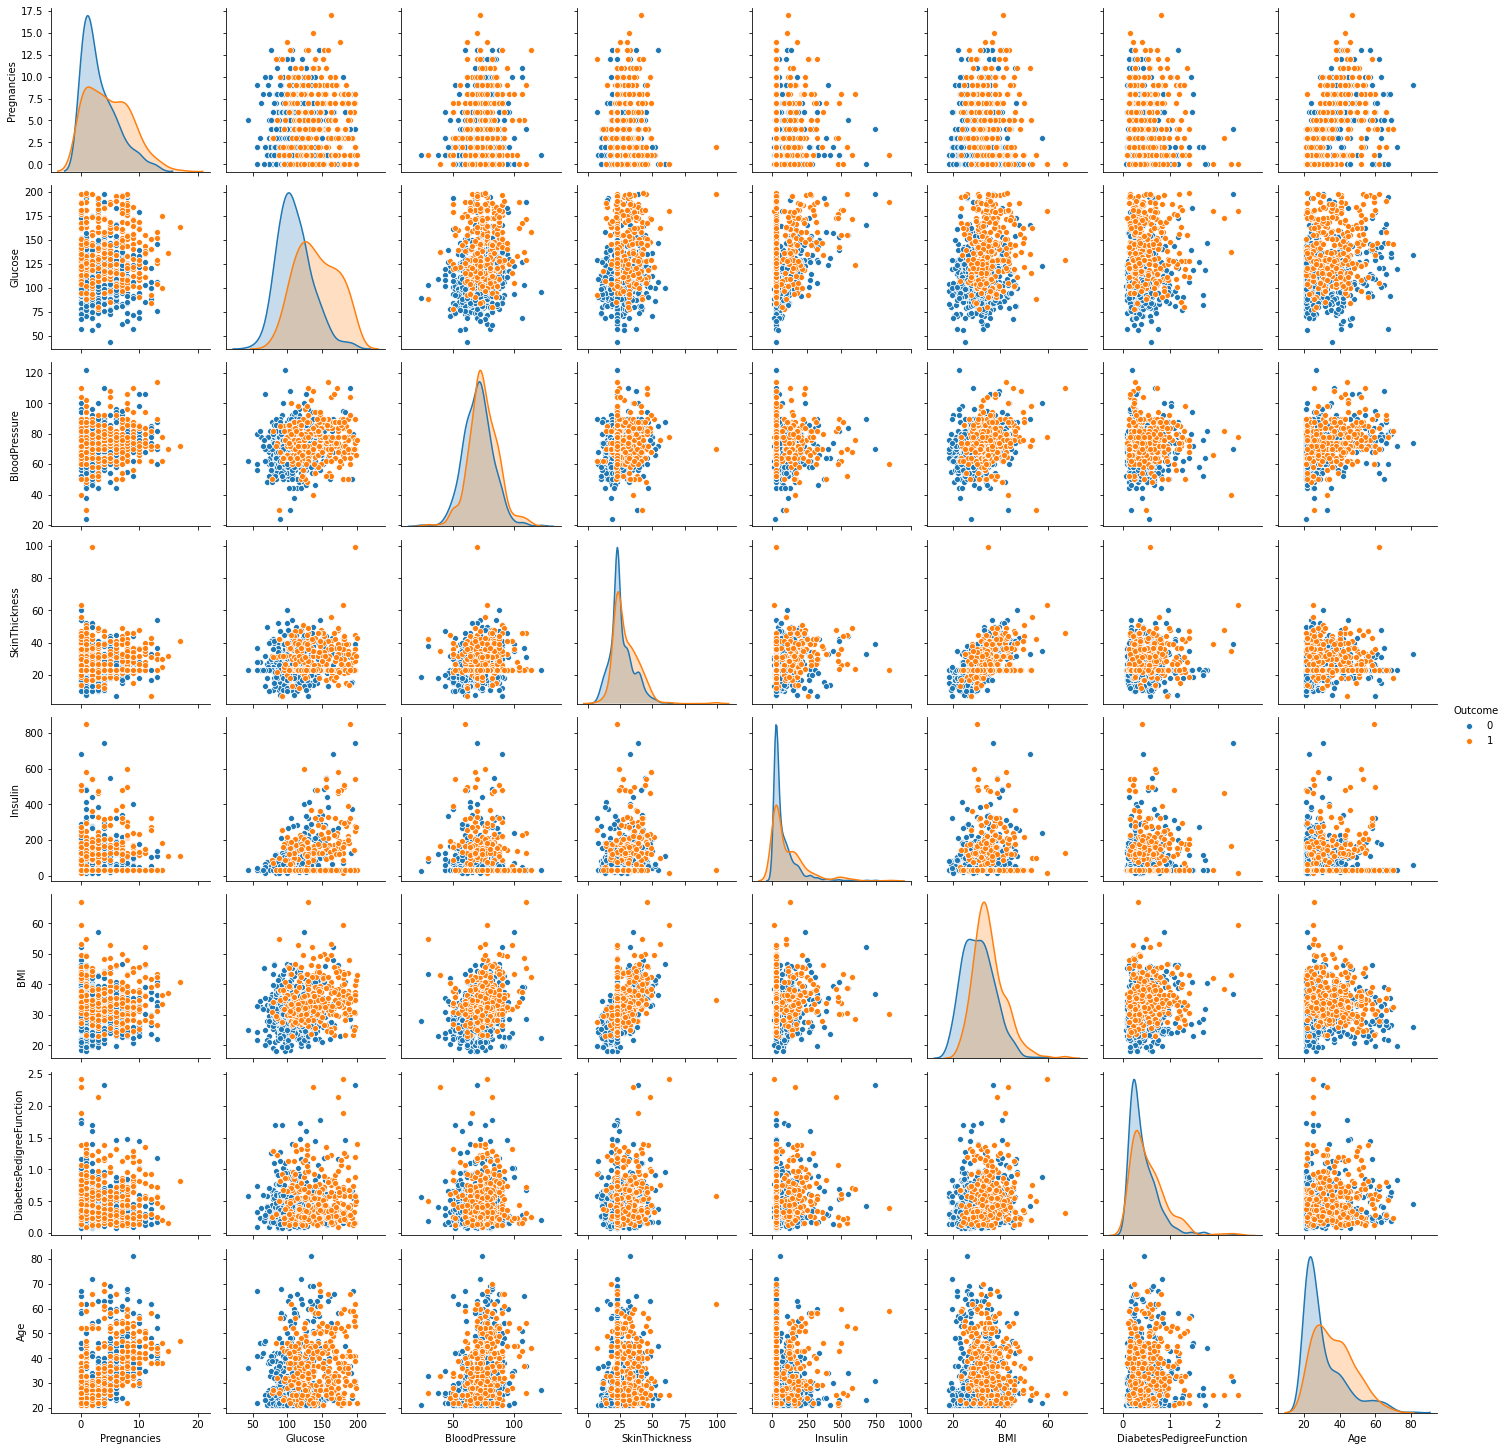

In [912]:
sns.pairplot(data=pima_df, hue="Outcome")


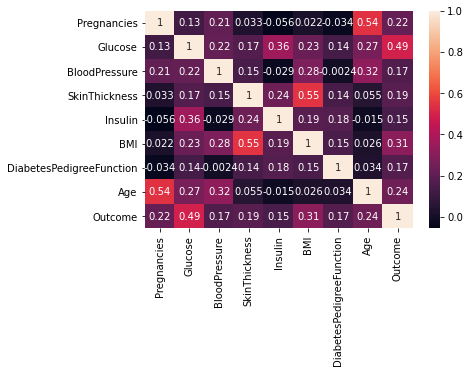

In [913]:
sns.heatmap(pima_df.corr(),annot=True)

# Insight:
From pairplot and corr we see that, the distribution of Glucose and bmi shows difference in outcome values where all the
other features dosent show much of seperation of classes.

from the heat map correleation if we see outcome versus other attributes glucose and bmi gives good corr rather than other values

So we can infer glucose and bmi will be better features for classifying compared to rest

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [914]:
X = pima_df.drop(labels=['Outcome'], axis=1)
Y = pima_df['Outcome']
print(X.shape,Y.shape)


(768, 8) (768,)


In [915]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=10)

In [916]:
print("-------------------TRAINING DATA-----------------------")
print("# of rows and independent features in training data : ",x_train.shape)
print("# of rows in target column of training data         : ",y_train.shape)
print("# of rows in target column (groupby personal loan)  : ",y_train.groupby(y_train).count())
print("-------------------TESTING DATA-----------------------")
print("# of rows and independent features in testing data  : ",x_test.shape)
print("# of rows in target column of training data         : ",y_test.shape)
print("# of rows in target column (groupby personal loan)  : ",y_test.groupby(y_test).count())

-------------------TRAINING DATA-----------------------
# of rows and independent features in training data :  (537, 8)
# of rows in target column of training data         :  (537,)
# of rows in target column (groupby personal loan)  :  Outcome
0    356
1    181
Name: Outcome, dtype: int64
-------------------TESTING DATA-----------------------
# of rows and independent features in testing data  :  (231, 8)
# of rows in target column of training data         :  (231,)
# of rows in target column (groupby personal loan)  :  Outcome
0    144
1     87
Name: Outcome, dtype: int64


In [917]:
sc = StandardScaler()
sc_x_train = sc.fit_transform(x_train)
sc_x_test = sc.transform(x_test)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [918]:
print("Max depth\tTraining Accuracy\tTesting Accuracy\tRMSE")

for i in range(1,15):
    dt=DecisionTreeClassifier(criterion='entropy',
                                max_depth=i,random_state=10)

    dt.fit(sc_x_train, y_train)
    predicted_dt = dt.predict(sc_x_test)
    print(i,'\t',dt.score(sc_x_train,y_train),'\t',dt.score(sc_x_test,y_test),'\t',np.sqrt(mean_squared_error(predicted_dt, y_test)))
   

Max depth	Training Accuracy	Testing Accuracy	RMSE
1 	 0.7690875232774674 	 0.7056277056277056 	 0.5425608669746597
2 	 0.7690875232774674 	 0.7056277056277056 	 0.5425608669746597
3 	 0.7728119180633147 	 0.6883116883116883 	 0.5582905262390825
4 	 0.7839851024208566 	 0.7142857142857143 	 0.5345224838248488
5 	 0.8268156424581006 	 0.7532467532467533 	 0.496742636335202
6 	 0.8361266294227188 	 0.7532467532467533 	 0.496742636335202
7 	 0.8547486033519553 	 0.7532467532467533 	 0.496742636335202
8 	 0.8715083798882681 	 0.7229437229437229 	 0.5263613559678152
9 	 0.8938547486033519 	 0.7316017316017316 	 0.5180716826832639
10 	 0.9199255121042831 	 0.7056277056277056 	 0.5425608669746597
11 	 0.9664804469273743 	 0.7056277056277056 	 0.5425608669746597
12 	 0.9776536312849162 	 0.7229437229437229 	 0.5263613559678152
13 	 0.9851024208566108 	 0.70995670995671 	 0.5385566730097122
14 	 0.9851024208566108 	 0.6926406926406926 	 0.5543999525246258


In [919]:
dt=DecisionTreeClassifier(criterion='entropy',
                                max_depth=5)

dt.fit(sc_x_train, y_train)
predicted_dt = dt.predict(sc_x_test)


# Insight:
By trying decision trees for different max dept from 1 to 14, the error was minimum when depth is 5,6 7 after which the error was increased and accuracy was good.

By increasing the max depth the model is getting over fit


# Q10 Print the accuracy of the model & print the confusion matrix 

In [920]:
print("Training accuracy : ",dt.score(sc_x_train,y_train))
print("Testing accuracy : ",dt.score(sc_x_test,y_test))
print("Confusion Matrix of Decision Tree")
print(confusion_matrix(y_test,predicted_dt))
print("Classificatin Report of Decision Tree")
print(classification_report(y_test,predicted_dt))

Training accuracy :  0.8268156424581006
Testing accuracy :  0.7489177489177489
Confusion Matrix of Decision Tree
[[126  18]
 [ 40  47]]
Classificatin Report of Decision Tree
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       144
           1       0.72      0.54      0.62        87

    accuracy                           0.75       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.75      0.74       231



# Insight:
The F1 score of class 1 is low because of lower samples 

For class 0 the F1 score is pretty good.

# Q11 Print the feature importance of the decision model

In [921]:
print("Feature\t\tFeature Importance")
print("__________________________________")
for i in range(0,8):
    print(pima_df.columns[i],"\t",dt.feature_importances_[i])


Feature		Feature Importance
__________________________________
Pregnancies 	 0.03228499392182361
Glucose 	 0.4874978640795635
BloodPressure 	 0.0
SkinThickness 	 0.044325996487476815
Insulin 	 0.015385584513046155
BMI 	 0.25169914569924057
DiabetesPedigreeFunction 	 0.02586224389255748
Age 	 0.1429441714062918


# Insight:
Glucose and BMI are the significant feature compared to the rest

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [922]:
print("Max depth\tTraining Accuracy\tTesting Accuracy\tRMSE")

for i in range(1,15):
    rf=RandomForestClassifier(criterion='entropy',
                                n_estimators=30,max_depth=i,random_state=10)
    rf.fit(sc_x_train,y_train)
    predicted_rf = rf.predict(sc_x_test)
    print(i,'\t',rf.score(sc_x_train,y_train),'\t',rf.score(sc_x_test,y_test),'\t',np.sqrt(mean_squared_error(predicted_rf, y_test)))


Max depth	Training Accuracy	Testing Accuracy	RMSE
1 	 0.7001862197392924 	 0.6363636363636364 	 0.6030226891555273
2 	 0.7690875232774674 	 0.7229437229437229 	 0.5263613559678152
3 	 0.8026070763500931 	 0.7272727272727273 	 0.5222329678670935
4 	 0.8249534450651769 	 0.7532467532467533 	 0.496742636335202
5 	 0.8491620111731844 	 0.7359307359307359 	 0.513876701232177
6 	 0.8770949720670391 	 0.7359307359307359 	 0.513876701232177
7 	 0.9106145251396648 	 0.7229437229437229 	 0.5263613559678152
8 	 0.9478584729981379 	 0.7402597402597403 	 0.5096471914376255
9 	 0.9646182495344506 	 0.7272727272727273 	 0.5222329678670935
10 	 0.9832402234636871 	 0.7359307359307359 	 0.513876701232177
11 	 0.994413407821229 	 0.7229437229437229 	 0.5263613559678152
12 	 0.9962756052141527 	 0.7359307359307359 	 0.513876701232177
13 	 1.0 	 0.7402597402597403 	 0.5096471914376255
14 	 0.9962756052141527 	 0.7402597402597403 	 0.5096471914376255


In [923]:
rf=RandomForestClassifier(criterion='entropy',
                                n_estimators=40,max_depth=6,random_state=10)
rf.fit(sc_x_train,y_train)
predicted_rf = rf.predict(sc_x_test)
print("Confusion Matrix of Random Forest Classifier")
print(confusion_matrix(y_test,predicted_rf))
print("Classificatin Report of Random Forest Classifier")
print(classification_report(y_test,predicted_rf))

Confusion Matrix of Random Forest Classifier
[[129  15]
 [ 45  42]]
Classificatin Report of Random Forest Classifier
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       144
           1       0.74      0.48      0.58        87

    accuracy                           0.74       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231



# Insight:
For 30 bootstrap samples by features and when max dept of decision tree is 4 the error is lowest and accuracy is good.

By increasing the max depth the model is getting over fit

F1 score of class 0 is same as decision tree but for class one f1 score is less compared to decision tree. Also poor F1 value of class 1 is because of less no. of samples

# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [924]:
print("Learning Rate\tTraining Accuracy\tTesting Accuracy\tRMSE")

for i in np.arange(0.01, 0.3, 0.01):
    ab = AdaBoostClassifier( base_estimator=None,
                            n_estimators=25,
                            learning_rate=i,
                            random_state=10)
    ab.fit(sc_x_train,y_train)
    predicted_ab = ab.predict(sc_x_test)
    print(i,'\t',ab.score(sc_x_train,y_train),'\t',ab.score(sc_x_test,y_test),'\t',np.sqrt(mean_squared_error(predicted_ab, y_test)))



Learning Rate	Training Accuracy	Testing Accuracy	RMSE
0.01 	 0.7690875232774674 	 0.7056277056277056 	 0.5425608669746597
0.02 	 0.7690875232774674 	 0.7056277056277056 	 0.5425608669746597
0.03 	 0.7746741154562383 	 0.7229437229437229 	 0.5263613559678152
0.04 	 0.7783985102420856 	 0.7229437229437229 	 0.5263613559678152
0.05 	 0.7802607076350093 	 0.7229437229437229 	 0.5263613559678152
0.060000000000000005 	 0.7821229050279329 	 0.7229437229437229 	 0.5263613559678152
0.06999999999999999 	 0.7821229050279329 	 0.7229437229437229 	 0.5263613559678152
0.08 	 0.7821229050279329 	 0.7229437229437229 	 0.5263613559678152
0.09 	 0.7821229050279329 	 0.7229437229437229 	 0.5263613559678152
0.09999999999999999 	 0.7821229050279329 	 0.7229437229437229 	 0.5263613559678152
0.11 	 0.7821229050279329 	 0.7229437229437229 	 0.5263613559678152
0.12 	 0.7821229050279329 	 0.7229437229437229 	 0.5263613559678152
0.13 	 0.7746741154562383 	 0.7272727272727273 	 0.5222329678670935
0.14 	 0.7746741

In [925]:
ab = AdaBoostClassifier( base_estimator=None,
                            n_estimators=25,
                            learning_rate=0.16,
                            random_state=10)
ab.fit(sc_x_train,y_train)
predicted_ab = ab.predict(sc_x_test)
print("Confusion Matrix of Ada Boost Classifier")
print(confusion_matrix(y_test,predicted_ab))
print("Classificatin Report of Ada Boost Classifier")
print(classification_report(y_test,predicted_ab))

Confusion Matrix of Ada Boost Classifier
[[135   9]
 [ 51  36]]
Classificatin Report of Ada Boost Classifier
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       144
           1       0.80      0.41      0.55        87

    accuracy                           0.74       231
   macro avg       0.76      0.68      0.68       231
weighted avg       0.75      0.74      0.72       231



# Insight:
when n_estimator is 25 and learning rate is 0.16 the algorithm gave best accuracy. For learning rate greater than that model was moving towards overfit

F1 score of class 0 is greater than decision tree and random forest but f1 score of class 1 is low. 

# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [926]:
print("Bagging using Decision trees")
bg = BaggingClassifier(n_estimators=25,random_state=10)
bg.fit(sc_x_train,y_train)
predicted_bg = bg.predict(sc_x_test)
print("Training Accuracy\tTesting Accuracy\tRMSE")
print(bg.score(sc_x_train,y_train),'\t',bg.score(sc_x_test,y_test),'\t',np.sqrt(mean_squared_error(predicted_bg, y_test)))

print("Bagging using Random forest")
bg = BaggingClassifier(n_estimators=25,base_estimator=rf,random_state=10)
bg.fit(sc_x_train,y_train)
predicted_bg = bg.predict(sc_x_test)
print("Training Accuracy\tTesting Accuracy\tRMSE")
print(bg.score(sc_x_train,y_train),'\t',bg.score(sc_x_test,y_test),'\t',np.sqrt(mean_squared_error(predicted_bg, y_test)))

print("Bagging using Logistic regression")
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
bg = BaggingClassifier(n_estimators=25,base_estimator=lr,random_state=10)
bg.fit(sc_x_train,y_train)
predicted_bg = bg.predict(sc_x_test)
print("Training Accuracy\tTesting Accuracy\tRMSE")
print(bg.score(sc_x_train,y_train),'\t',bg.score(sc_x_test,y_test),'\t',np.sqrt(mean_squared_error(predicted_bg, y_test)))
print("Confusion Matrix of Ada Boost Classifier")
print(confusion_matrix(y_test,predicted_bg))
print("Classificatin Report of Ada Boost Classifier")
print(classification_report(y_test,predicted_bg))

Bagging using Decision trees
Training Accuracy	Testing Accuracy	RMSE
1.0 	 0.7402597402597403 	 0.5096471914376255
Bagging using Random forest
Training Accuracy	Testing Accuracy	RMSE
0.8733705772811918 	 0.7402597402597403 	 0.5096471914376255
Bagging using Logistic regression
Training Accuracy	Testing Accuracy	RMSE
0.7746741154562383 	 0.7359307359307359 	 0.513876701232177
Confusion Matrix of Ada Boost Classifier
[[128  16]
 [ 45  42]]
Classificatin Report of Ada Boost Classifier
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       144
           1       0.72      0.48      0.58        87

    accuracy                           0.74       231
   macro avg       0.73      0.69      0.69       231
weighted avg       0.73      0.74      0.72       231



# Insight:
After running the bagging alorithm using the decision tree, random forest and logistic regression. Logistic regression gave better accuracy. Decision tree and random forest is overfit.

F1 score is good for class 0 than class 1 because class 1 has less no of samples

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [927]:
print("Learning Rate\tMax Depth\tTraining Accuracy\tTesting Accuracy\tRMSE")

for i in np.arange(0.03, 0.04, 0.01):
    for j in range(1,11):
    #print(i,"\t",a)
        gb=GradientBoostingClassifier(loss='deviance',
                                    learning_rate=i,
                                    n_estimators=20,max_depth=j)
        gb.fit(sc_x_train,y_train)
        predicted_gb = gb.predict(sc_x_test)
        print(i,"\t\t",j,"\t\t",gb.score(sc_x_train,y_train),'\t',gb.score(sc_x_test,y_test),'\t',np.sqrt(mean_squared_error(predicted_gb, y_test)))



Learning Rate	Max Depth	Training Accuracy	Testing Accuracy	RMSE
0.03 		 1 		 0.7616387337057728 	 0.6796536796536796 	 0.5659914490045943
0.03 		 2 		 0.7616387337057728 	 0.6796536796536796 	 0.5659914490045943
0.03 		 3 		 0.770949720670391 	 0.683982683982684 	 0.5621541745974284
0.03 		 4 		 0.7988826815642458 	 0.7012987012987013 	 0.5465357250000211
0.03 		 5 		 0.8491620111731844 	 0.7445887445887446 	 0.5053822864043174
0.03 		 6 		 0.8715083798882681 	 0.7229437229437229 	 0.5263613559678152
0.03 		 7 		 0.8901303538175046 	 0.7272727272727273 	 0.5222329678670935
0.03 		 8 		 0.9422718808193669 	 0.7359307359307359 	 0.513876701232177
0.03 		 9 		 0.9646182495344506 	 0.7316017316017316 	 0.5180716826832639
0.03 		 10 		 0.9720670391061452 	 0.7359307359307359 	 0.513876701232177
0.04 		 1 		 0.7690875232774674 	 0.6926406926406926 	 0.5543999525246258
0.04 		 2 		 0.770949720670391 	 0.696969696969697 	 0.5504818825631803
0.04 		 3 		 0.7970204841713222 	 0.7186147186147186 

In [928]:
gb=GradientBoostingClassifier(loss='deviance',
                                    learning_rate=0.03,
                                    n_estimators=20,max_depth=5)
gb.fit(sc_x_train,y_train)
predicted_gb = gb.predict(sc_x_test)
print("Confusion Matrix of Gradient Boost Classifier")
print(confusion_matrix(y_test,predicted_gb))
print("Classificatin Report of Gradient Boost Classifier")
print(classification_report(y_test,predicted_gb))

Confusion Matrix of Gradient Boost Classifier
[[136   8]
 [ 52  35]]
Classificatin Report of Gradient Boost Classifier
              precision    recall  f1-score   support

           0       0.72      0.94      0.82       144
           1       0.81      0.40      0.54        87

    accuracy                           0.74       231
   macro avg       0.77      0.67      0.68       231
weighted avg       0.76      0.74      0.71       231



# Insight:
For Learning rate 0.03 and depth 5 the traning and test accuracy seems good after which the model was moving towards overfit

       

DT: 0.578283 (0.082912)
RF: 0.670281 (0.111400)
ADB: 0.599623 (0.109797)
BG: 0.624631 (0.055283)
GRB: 0.624631 (0.055283)


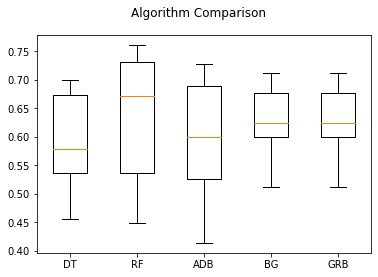

In [929]:
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

models = []
models.append(('DT', dt))
models.append(('RF', rf))
models.append(('ADB', ab))
models.append(('BG', bg))
models.append(('GRB', bg))

results = []
names = []
scoring = 'f1'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=10)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Insight:
    
Random forest gives greatest accuracy but also reach lowest accuracy but bagging and gradient descent boosting dosent give very low or high but gives average accuracy.

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [930]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
eclf1 = VotingClassifier(estimators=[('DT', dt), ('RF', rf), ('ADB', ab) , ('BG',bg), ('GRB',gb)], voting='hard')
eclf1 = eclf1.fit(sc_x_train, y_train)
print(eclf1.predict(sc_x_test))
print(eclf1.score(sc_x_test,y_test))

[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1
 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0
 0 1 0 0 1 1 0 0 0]
0.7445887445887446
